In [2]:
import twitter
import json
import numpy as np
from prettytable import PrettyTable
import nltk
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

In [32]:

#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'YBicfvPPR7YmsJdFtd8qGATmI'
    CONSUMER_SECRET ='YYXKSBw5n6b5dpbwmMfZTjqJcUnDQm6fxlNUEnf63k5idJsj2m'
    OAUTH_TOKEN = '774076984561430528-1ENguVW2E40PSue6YWnDuCBUyASjhGB'
    OAUTH_TOKEN_SECRET = 'ZcjrXboPxPmGEXzq2n1GQN1s7u8ZAXQeKWDSVIrZxQMkV'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
# auth = [i.decode("utf-8") for i in auth]    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

# define a function to search Twitter
def twitter_search(twitter_api, q, max_results, **kw):

    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets
    search_results = twitter_api.search.tweets(q=q, count=500, **kw)
    
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://dev.twitter.com/docs/rate-limiting/1.1/limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.

    # Enforce a reasonable limit
    max_results = min(1000, max_results)
  
    for _ in range(1000): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError:
            break
    
        kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
    
        if len(statuses) > max_results:
            break
    
    return statuses

# connect to twitter and search
twitter_api = oauth_login()
q = "love"

results = twitter_search(twitter_api, q, max_results=1000)
len(results)
results

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Dec 07 00:06:23 +0000 2016',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 17364412,
     'id_str': '17364412',
     'indices': [3, 16],
     'name': 'blackbear',
     'screen_name': 'iamblackbear'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 806288710727778304,
  'id_str': '806288710727778304',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 4268,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,
   'created_at': 'Mon Dec 05 19:56:42 +0000 2016',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [],
    'user_mentions': []},
  

In [5]:
status_id = [ status['id'] for status in results ]
status_texts = [ status['text'] for status in results ]
status_texts

['RT @FanClub_TCC: TCCホース\nカプチーノコースト✨\n岡山に来た当初は、人に近寄らず不安で泣きそうな顔をしてましたが、今ではすっかり甘えんぼさん💕人に対してこんな表情をしてくれます😊\n馬場では高めの障害でもどんどん飛んでしまう女の子なんですよ☆\nhttps://…',
 'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings',
 'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings',
 'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings',
 'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings',
 'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings',
 'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you"

In [10]:
status_texts

AttributeError: 'list' object has no attribute 'type'

In [15]:
raw_tweets = list(zip(status_id, status_texts))
# raw_tweets = np.concatenate([status_id, status_texts], axis=0)
raw_tweets

[(806278113395032064,
  'RT @FanClub_TCC: TCCホース\nカプチーノコースト✨\n岡山に来た当初は、人に近寄らず不安で泣きそうな顔をしてましたが、今ではすっかり甘えんぼさん💕人に対してこんな表情をしてくれます😊\n馬場では高めの障害でもどんどん飛んでしまう女の子なんですよ☆\nhttps://…'),
 (806278113390952449,
  'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings'),
 (806278113349038081,
  'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings'),
 (806278113349013504,
  'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings'),
 (806278113340624897,
  'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i love you" \n\nall have two different meanings'),
 (806278113327980544,
  'RT @BeaIive: "sorry" vs "I\'m sorry"\n"night" vs "goodnight" \n"bye" vs "goodbye" \n"love you" vs "i l

In [27]:
status_texts = [ status['text'] 
                 for status in results ]

nltk.download('stopwords')
nltk_eng_lower = nltk.corpus.stopwords.words('english')
nltk_eng_upper = [ word.capitalize() for word in nltk_eng_lower ]
# Filter out stop words
stop_words = nltk_eng_lower + nltk_eng_upper + [
'.',
',',
'--',
'\'s',
'?',
')',
'(',
':',
'\'',
'\'re',
'"',
'-',
'}',
'{',
u'—',
'RT',
'&amp;',
'would',
'will',
'love','Love','LOVE','https','co'
]

words = [ w for t in status_texts for w in t.split() ]
word_gen = [ word for word in words if word not in stop_words ]

status_texts
data= json.dumps(word_gen , indent=10)
file = open('foo.txt','w')
file.write(data)
file.close()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mniu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\mniu\AppData\Local\Continuum\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:286: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


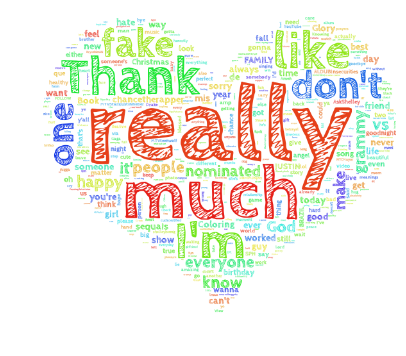

In [30]:
text = ' '.join(word_gen)

twitter_mask = imread('./love.png', flatten=True)
wc = WordCloud(font_path='./CabinSketch-Bold.ttf',max_words=500, stopwords=stop_words, 
              mask=twitter_mask,random_state=1, background_color='white'
             ).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [31]:
from collections import Counter
for word in [word_gen]:
    c = Counter(word)
    # print(c.most_common()[:30]) # top 30

# plot a table of the top 30 words with their counts
Popwords = c.most_common()[:50]

pt = PrettyTable(field_names=['Words', 'Count']) 
[pt.add_row(kv) for kv in Popwords ]
pt.align['Words'], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt)

+-------------------+-------+
| Words             | Count |
+-------------------+-------+
| really            |    74 |
| much              |    51 |
| I'm               |    43 |
| like              |    42 |
| u                 |    36 |
| fake              |    35 |
| you.              |    33 |
| don't             |    31 |
| Thank             |    30 |
| vs                |    30 |
| everyone          |    28 |
| nominated         |    26 |
| @sequaIs:         |    25 |
| one               |    25 |
| 2017.             |    25 |
| @chancetherapper: |    25 |
| 7                 |    24 |
| know              |    23 |
| people            |    22 |
| always            |    22 |
| worked            |    22 |
| Coloring          |    21 |
| never             |    21 |
| #grammys.         |    21 |
| God.              |    21 |
| Book,             |    21 |
| Glory             |    21 |
| want              |    20 |
| love.             |    19 |
| make              |    19 |
| can't   